<a href="https://colab.research.google.com/github/muscak/Master-Machine-Learning-Algorithms/blob/master/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Discriminant Analysis (LDA)



## Table of Content

1. [Introduction](#intro)
2. [Import Libraries](#libraries)

## Introduction<a id='intro'></a>

The purpose of this project

## Import Libraries<a id='libraries'></a>

In [66]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import math as m

In [5]:
# Creating the feature(s)
x = [4.667797637, 5.509198779, 4.702791608, 5.956706641, 5.738622413, 5.027283325, 4.805434058, 4.425689143, 
5.009368635, 5.116718815, 6.370917709, 2.895041947, 4.666842365, 5.602154638, 4.902797978, 5.032652964, 4.083972925, 4.875524106, 
4.732801047, 5.385993407, 20.74393514, 21.41752855, 20.57924186, 20.7386947, 19.44605384, 18.36360265, 19.90363232, 19.10870851, 
18.18787593, 19.71767611, 19.09629027, 20.52741312, 20.63205608, 19.86218119, 21.34670569, 20.333906, 21.02714855, 18.27536089, 
21.77371156, 20.65953546]

# Creating the label
y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

In [42]:
# Convert the data into dataframe
df = pd.DataFrame(columns=['x', 'y'])
df['x'] = x
df['y'] = y

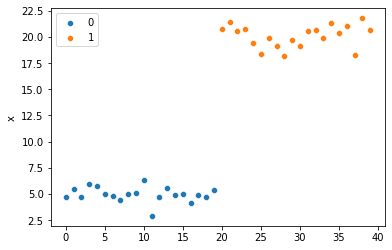

In [21]:
# Scatter plot to see the probability distribution of the labels within the dataset
sb.scatterplot(data=df['x'][df['y']==0], label='0')
sb.scatterplot(data=df['x'][df['y']==1], label='1')
plt.show()

In [27]:
prob_0 = len(df[df['y']==0]) / len(df)
print('Probability of getting 0: ', prob_0)
prob_1 = len(df[df['y']==1]) / len(df)
print('Probability of getting 1: ', prob_1)

Probability of getting 0:  0.5
Probability of getting 1:  0.5


🔎 To distinguish the difference easily. The real life scenarios will be harder than this.

## Manual Implementation of LDA

The mean (mean) value of each input ($x$) for each class ($k$) can be estimated in the normal way by dividing the sum of values by the total number of values.
$$mean_k = \frac{1}{n_k} × \sum\limits_{i=1}^{n}x_i$$

Where $mean_k$ is the mean value of $x$ for the class $k$, $n_k$ is the number of instances with class $k$. The variance is calculated across all classes as the average squared difference of each value from the mean.

$$\sigma^2 = \frac{1}{n - K} × \sum\limits_{i=1}^{n}(x_i - mean_k))^2$$

Where $\sigma^2$ is the variance across all inputs ($x$), $n$ is the number of instances, $K$ is the number of classes and meank is the mean of x for the class to which $x_i$ belongs.


### Making Predictions with LDA

$$$$
$$D_k(x) = x × \frac{mean_k}{\sigma^2} - \frac{mean_k^2}{2 × \sigma^2} + ln(P(k))$$

$Dk(x)$ is the discriminate function for class $k$ given input $x$, the $mean_k$, $\sigma^2$ and $P(k)$ are all estimated from your data. The $ln()$ function is the natural logarithm.

In [30]:
mean_0 = df['x'][df['y']==0].mean()
print('Average of x where y is 0: ', mean_0)
mean_1 = df['x'][df['y']==1].mean()
print('Average of x where y is 1: ', mean_1)

Average of x where y is 0:  4.975415506999999
Average of x where y is 1:  20.087062921


In [45]:
df['x-mean'] = ''
df['x-mean'] = np.where(df['y'] == 0, mean_0 - df['x'], df['x-mean'])
df['x-mean'] = np.where(df['y'] == 1, mean_1 - df['x'], df['x-mean'])

In [48]:
df['x-mean_2'] = df['x-mean'].pow(2)

In [50]:
sum_0_2 = df['x-mean_2'][df['y']==0].sum()
sum_0_2

10.158230131719305

In [51]:
sum_1_2 = df['x-mean_2'][df['y']==1].sum()
sum_1_2

21.493167084411787

In [57]:
variance_x = (1 / (len(df['x']) - 2)) * (sum_0_2 + sum_1_2)
variance_x

0.8329315056876604

In [78]:
df_predictions = pd.DataFrame(columns=['x', 'Disc_y_0', 'Disc_y_1', 'Predictions', 'y', 'Error'])
df_predictions[['x', 'y']] = df[['x', 'y']]

In [79]:
df_predictions['Disc_y_0'] = df_predictions['x'] * (mean_0 / variance_x) - (np.square(mean_0) / (2 * variance_x)) + np.log(prob_0)
df_predictions.head()

,x,Disc_y_0,Disc_y_1,Predictions,y,Error
0,4.667798,12.329356,NaN,NaN,0,NaN
1,5.509199,17.355364,NaN,NaN,0,NaN
2,4.702792,12.538388,NaN,NaN,0,NaN
3,5.956707,20.028498,NaN,NaN,0,NaN
4,5.738622,18.725798,NaN,NaN,0,NaN


In [80]:
df_predictions['Disc_y_1'] = df_predictions['x'] * (mean_1 / variance_x) - (np.square(mean_1) / (2 * variance_x)) + np.log(prob_1)
df_predictions.head()

,x,Disc_y_0,Disc_y_1,Predictions,y,Error
0,4.667798,12.329356,-130.334904,NaN,0,NaN
1,5.509199,17.355364,-110.043586,NaN,0,NaN
2,4.702792,12.538388,-129.490986,NaN,0,NaN
3,5.956707,20.028498,-99.251440,NaN,0,NaN
4,5.738622,18.725798,-104.510782,NaN,0,NaN


In [81]:
df_predictions.loc[df_predictions['Disc_y_0'] > df_predictions['Disc_y_1'], 'Predictions'] = 0
df_predictions.head()

,x,Disc_y_0,Disc_y_1,Predictions,y,Error
0,4.667798,12.329356,-130.334904,0,0,NaN
1,5.509199,17.355364,-110.043586,0,0,NaN
2,4.702792,12.538388,-129.490986,0,0,NaN
3,5.956707,20.028498,-99.251440,0,0,NaN
4,5.738622,18.725798,-104.510782,0,0,NaN


In [82]:
df_predictions.loc[df_predictions['Disc_y_0'] < df_predictions['Disc_y_1'], 'Predictions'] = 1
df_predictions.head()

,x,Disc_y_0,Disc_y_1,Predictions,y,Error
0,4.667798,12.329356,-130.334904,0,0,NaN
1,5.509199,17.355364,-110.043586,0,0,NaN
2,4.702792,12.538388,-129.490986,0,0,NaN
3,5.956707,20.028498,-99.251440,0,0,NaN
4,5.738622,18.725798,-104.510782,0,0,NaN


In [84]:
df_predictions.loc[df_predictions['Predictions'] == df_predictions['y'], 'Error'] = 0
df_predictions.loc[df_predictions['Predictions'] != df_predictions['y'], 'Error'] = 1
df_predictions.head(40)

,x,Disc_y_0,Disc_y_1,Predictions,y,Error
0,4.667798,12.329356,-130.334904,0,0,0
1,5.509199,17.355364,-110.043586,0,0,0
2,4.702792,12.538388,-129.490986,0,0,0
3,5.956707,20.028498,-99.251440,0,0,0
4,5.738622,18.725798,-104.510782,0,0,0
5,5.027283,14.476700,-121.665510,0,0,0
6,4.805434,13.151510,-127.015650,0,0,0
7,4.425689,10.883150,-136.173617,0,0,0
8,5.009369,14.369689,-122.097542,0,0,0
9,5.116719,15.010932,-119.508674,0,0,0


In [87]:
acc = (1 - (df_predictions['Error'].sum() / len(df_predictions['Error']))) * 100

print('Accuracy: {:.2f}%'.format(acc))

Accuracy: 100.00%
